# Examining Restaurant Inspection Scores for Austin Texas,  June 2014- June 2017

Restaurant inspection scores are real world measurements of the compliance of currently operating restaurant or food establishments with the Texas Food Establishment Rules. The Texas Food Establishment Rules are the laws and ordinances governing the receiving, storing, preparing, holding and serving of food in all food establishments. The rules were laid out and have been updated over time to ensure food quality and sanitation standards are adhered to. By examining the scores, we can take a look at how compliant Austin is to those rules and see if there are any corrolating factors contained within our data. The data was gathered on June 20th from the data.austintexas.gov website in the form of a csv file. The City of Austin maintains the domain and the site specifies that it is updated once a week. A note up front about how scores are measured. "If no violations are found, a score of 100 is achieved. If more than 30 points are lost, a re-inspection is required and corrections must be made to bring the score above 70, in accordance with the Texas Food Establishment Rules. If subsequent inspections score below 70, compliance actions will be taken."

Before examining the data, we must prepare the environment, import the information we want to manipulate, and the supporting tools, and clean the data as needed to ready it for further analysis. First, I converted the inspection date to a datetime object, then used pandas to add a year and month column to the data frame. Next, I converted the zipcodes to integers, dropping rows with zip codes that raised a value error.

In [ ]:
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib.pyplot as plt
from scipy import stats
import decimal
from datetime import datetime 
from collections import Counter
%matplotlib inline 

res_df = pd.read_csv('Restaurant_Inspection_Scores.csv')

pd.to_datetime(res_df['Inspection Date']) ;

res_df['Year'] = pd.DatetimeIndex(res_df['Inspection Date']).year
res_df['Month'] = pd.DatetimeIndex(res_df['Inspection Date']).month

try:
    res_df['Zip Code'].astype(int)
except(ValueError):
    res_df.drop()



Once everything imported, and the data frame was set up, I was able to manipulate the data, and seek some summary statistics. To look at the distribution of scores for the entire dataset I used a histogram, and assigned it a total of twenty bins. I chose twenty bins so the scores would be separated into groups with a range of only 5 points. I plotted the mean score, marked with a red line, with corresponding upper and lower standard deviations. It looks like it's a normal standard distribution, with 100 as the maximum and tapering off the lower you go. The mean score for the City of Austin for all three years is 91.32, with one upper standard deviation at 99 and a lower single standard deviation at 84. 

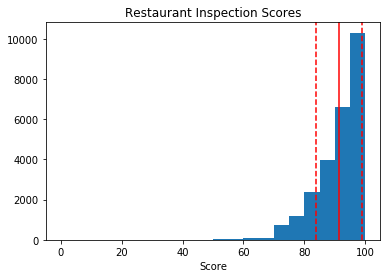

91.32
84.0 2
99.0 2


In [42]:
score = res_df['Score']
low_std = [res_df['Score'].mean() - res_df['Score'].std()]
up_std = [res_df['Score'].mean() + res_df['Score'].std()]
twenty_bins = [0,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100]

plt.hist(score, bins=twenty_bins)
plt.title('Restaurant Inspection Scores')
plt.xlabel('Score')
plt.axvline([res_df['Score'].mean()], color='red')
plt.axvline(x=low_std, color='red', linestyle='--')
plt.axvline(x=up_std, color='red', linestyle='--')

plt.show()

print(round(res_df['Score'].mean(),2))
print(round(res_df['Score'].mean() - res_df['Score'].std()),2) # lower standard deviation
print(round(res_df['Score'].mean() + res_df['Score'].std()),2) # upper standard deviation

Next, I divided the data per year, and calculated the mean of each. I plotted each set on a histogram, with lines showing the mean and one standard deviation on either side. Again, I split them into twenty bins and this time labeled how many records were found for each year. One thing jumped out as I looked at score count per year. The counts for 2014 and 2017 are approximately half of the counts for 2015 and 2016. The cause is the use of a rolling calendar by the City of Austin to maintain their database of scores. Because 2017 and 2014 do not have complete data, I will use 2015 and 2016 for our analysis later.

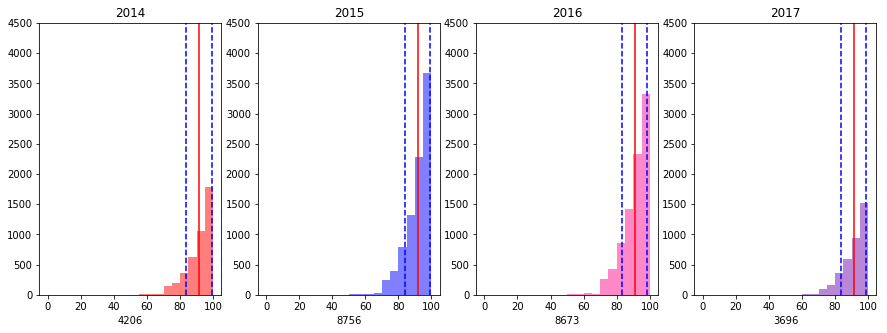

In [266]:
year_2017 = res_df[res_df['Year'] == 2017]
year_2016 = res_df[res_df['Year'] == 2016]
year_2015 = res_df[res_df['Year'] == 2015]
year_2014 = res_df[res_df['Year'] == 2014]

plt.figure(figsize=(15, 5))

plt.subplot(1, 4, 1)

plt.hist(year_2014['Score'], color='red', alpha=.5, bins=twenty_bins)
plt.ylim(0, 4500)
mean2014 = np.mean(year_2014['Score'])
st_dev2014 = np.std(year_2014['Score'])
plt.axvline(x=mean2014, color='red')
plt.axvline(x=(mean2014 + st_dev2014), color='blue', linestyle='--')
plt.axvline(x=(mean2014 - st_dev2014), color='blue', linestyle='--')
plt.xlabel(len(year_2014['Score']))
plt.title('2014')

plt.subplot(1, 4, 2)
plt.hist(year_2015['Score'], color='blue', alpha=.5, bins=twenty_bins)
plt.ylim(0, 4500)
mean2015 = np.mean(year_2015['Score'])
st_dev2015 = np.std(year_2015['Score'])
plt.axvline(x=mean2015, color='red')
plt.axvline(x=(mean2015 + st_dev2015), color='blue', linestyle='--')
plt.axvline(x=(mean2015 - st_dev2015), color='blue', linestyle='--')
plt.xlabel(len(year_2015['Score']))
plt.title('2015')

plt.subplot(1, 4, 3)
plt.hist(year_2016['Score'], color='#FF1493', alpha=.5, bins=twenty_bins)
plt.ylim(0, 4500)
mean2016 = np.mean(year_2016['Score'])
st_dev2016 = np.std(year_2016['Score'])
plt.axvline(x=mean2016, color='red')
plt.axvline(x=(mean2016 + st_dev2016), color='blue', linestyle='--')
plt.axvline(x=(mean2016 - st_dev2016), color='blue', linestyle='--')
plt.xlabel(len(year_2016['Score']))
plt.title('2016')


plt.subplot(1, 4, 4)
plt.hist(year_2017['Score'], color='#770FAF', alpha=.5, bins=twenty_bins)
plt.ylim(0, 4500)
mean2017 = np.mean(year_2017['Score'])
st_dev2017 = np.std(year_2017['Score'])
plt.axvline(x=mean2017, color='red')
plt.axvline(x=(mean2017 + st_dev2016), color='blue', linestyle='--')
plt.axvline(x=(mean2017 - st_dev2016), color='blue', linestyle='--')
plt.xlabel(len(year_2017['Score']))
plt.title('2017')

plt.show()

Once the data was divided by year, I grouped it by zip code and graphed the average number of inspections per zip code for each year. The average number of inspections per zip code in 2015 was 159, and the 2016 average is 163.

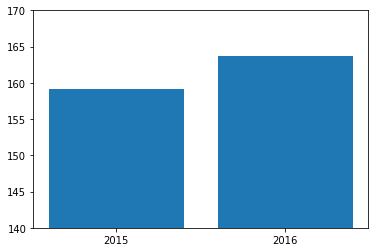

In [196]:
av_zip_2016 = year_2016.groupby('Zip Code').Score.agg('count').mean()
av_zip_2015 = year_2015.groupby('Zip Code').Score.agg('count').mean()

years = (2015, 2016)
zips_av = [av_zip_2015, av_zip_2016]
y_pos = np.arange(len(years))

plt.bar(y_pos, zips_av, align='center')
plt.xticks(y_pos, years)
plt.ylim(ymax=170, ymin=140)
plt.show()

Next, I gathered how many inspections happened per month, and graphed them beside each other from Jan-Dec with 2015 on the left and 2016 on the right. At first glance there looks like a sort of wave pattern as you go through the year, with more inspections happening in the spring and fall and less in the summer and midwinter. 

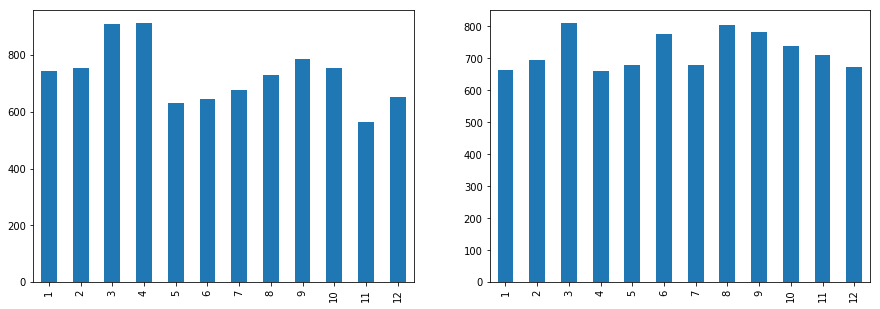

In [355]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
year_2015['Month'].value_counts().sort_index().plot(kind='bar')
plt.subplot(1, 2, 2)
year_2016['Month'].value_counts().sort_index().plot(kind='bar')
plt.show()
#need to reorder this

Next, I took my data grouped by year, and divided them each into pass and fail groups for each year. I then graphed these values in a pie chart. The failure rate for each year was actually below 1% for each year. Only .7% of inspections earned a score of 69 or lower. 

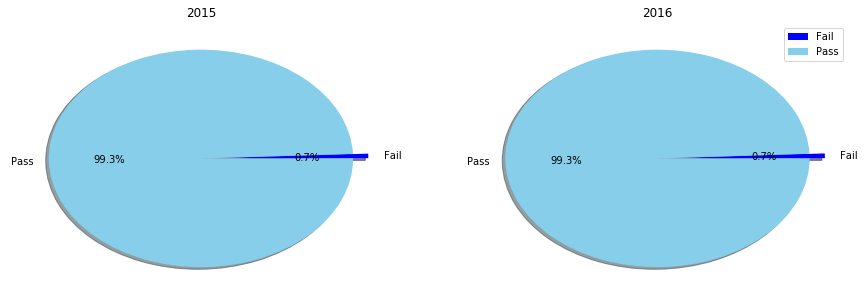

In [265]:
fail_2016 = year_2016[year_2016['Score'] < 70]
fail_2015 = year_2015[year_2015['Score'] < 70]

pass_2016 = year_2016[year_2016['Score'] > 70]
pass_2015 = year_2015[year_2015['Score'] > 70]

labels = 'Failed', 'Passed'

plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
fail_percent_2015 = len(fail_2015['Score'])
pass_percent_2015 = len(pass_2015['Score'])
labels = ('Fail', 'Pass')
sizes2015 = [fail_percent_2015, pass_percent_2015]
colors = ['blue', 'skyblue']
explode = (.1, 0)

plt.pie(sizes2015, 
        labels=labels, 
        colors=colors, 
        shadow=True, 
        startangle=0, 
        explode=explode,
        autopct='%1.1f%%')
plt.title('2015')

plt.subplot(1, 2, 2)
fail_percent_2016 = len(fail_2016['Score'])
pass_percent_2016 = len(pass_2016['Score'])
labels = ('Fail', 'Pass')
sizes2016 = [fail_percent_2016, pass_percent_2016]
colors = ['blue', 'skyblue']

plt.pie(sizes2016,
        labels=labels,
        colors=colors,
        shadow=True,
        startangle=0,
        explode=explode,
        autopct='%1.1f%%')
plt.title('2016')
plt.legend()
plt.show()

Next, I went over the data and pulled out a list of unique zip codes. I then used this list to create a bar chart with the average values per unique zip code.  The first thing that stood out is the apparent difference between the highest and lowest averages. They both stand far apart from the others. A closer look at the zip codes reveals a very low count for each of the highest and lowest average score.

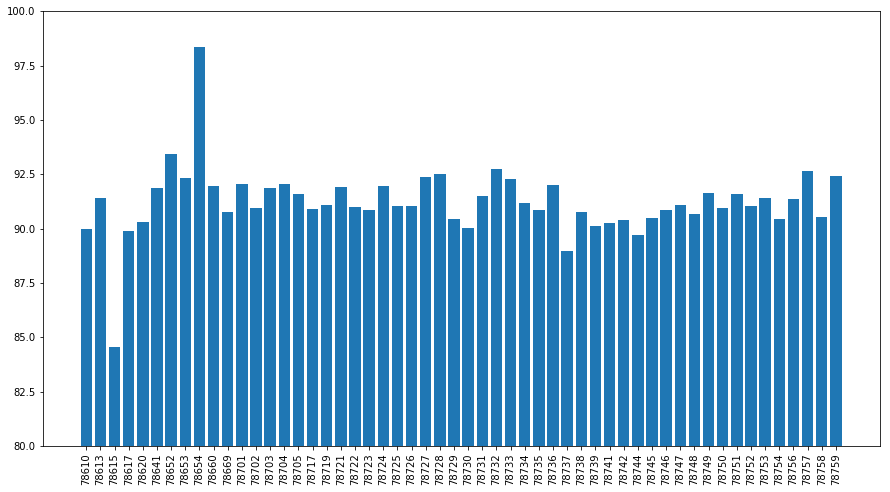

In [388]:
seenzip = [] # creating new variables
uniquezip = []
repeat = []

for x in res_df['Zip Code']: # checking each item in failed_ID
    if x not in seenzip: # placing the item examined  into appropriate variables
        uniquezip.append(x)
        seenzip.append(x)
    elif x in seenzip:
        repeat.append(x)

#for i in uniquezip:
#    if i == res_df['Zip Code']:
#        newzipvariable += res_df['Score'].sum()
zipmean = round(res_df.groupby('Zip Code').Score.mean(),2)
y_pos = np.arange(len(uniquezip))
zipsorted = (sorted(uniquezip))
y_pos = np.arange(len(zipsorted))

plt.figure(figsize=(15,8))
plt.bar(y_pos, zipmean, align='center')
plt.xticks(y_pos, zipsorted)
plt.xticks(rotation=90)
plt.ylim(ymax=100, ymin=80)
plt.show()
# print(res_df.groupby('Zip Code').Score.count()) 

With all the summary statistics worked out, it was time to move on to comparing the data to itself in different ways. First, I grouped the data into two arrays of zip codes with corresponding average scores, one for each year, and then compared the two using the scipy stats tool built to perform a t test. I had decided on the standard .05 significance level. The calculation returned a t test value of -3.11.. and a p value of .00240.. .

In [394]:


zipmean2015 = round(year_2015.groupby('Zip Code').Score.mean(),2)
zipmean2016 = round(year_2016.groupby('Zip Code').Score.mean(),2)

stats.ttest_ind(zipmean2016,
                zipmean2015)

# stats.ttest_ind(year_2016.groupby('Zip Code').Score.agg('mean'),
 #               res_df.groupby('Zip Code').Score.agg('mean'))

Ttest_indResult(statistic=-3.1102200888605318, pvalue=0.0024071767217103981)

# i thought i told you to stop ; compare mean scores over time

# Analytic question

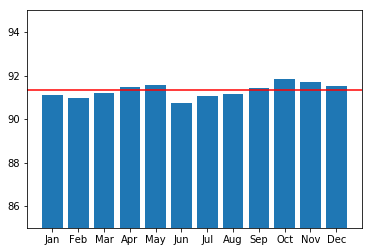

Month
1     91.13
2     90.95
3     91.21
4     91.49
5     91.57
6     90.72
7     91.05
8     91.14
9     91.44
10    91.84
11    91.72
12    91.52
Name: Score, dtype: float64


Ttest_indResult(statistic=-2.2705529095619794, pvalue=0.033314496790187227)

In [364]:
monthmean = round(res_df.groupby('Month').Score.mean(),2)
y_pos = np.arange(len(monthmean))
months = ('Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec')
zips_av = [av_zip_2015, av_zip_2016]

plt.bar(y_pos, monthmean, align='center')
plt.xticks(y_pos, months)
plt.ylim(ymax=95, ymin=85)
plt.axhline(y=(res_df['Score'].mean()), color='r')
plt.show()
print(monthmean)

stats.ttest_ind(res_df.groupby('Month').Score.agg('mean'),
                year_2015.groupby('Month').Score.agg('mean'))

#use sp.ttest_ind to calculate t values 
#from scipy.stats import ttest_ind

#cat1 = my_data[my_data['Category']=='cat1']
#cat2 = my_data[my_data['Category']=='cat2']

#ttest_ind(cat1['values'], cat2['values'])

# and we're at the end